In [1]:
import numpy as np
np.random.seed(1337)
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed,Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
batch_start = 0 
time_steps = 20
batch_size = 50
input_size = 1
output_size = 1
cell_size = 20
learning_rate = 0.006

In [3]:
def get_batch():
    global batch_start,time_steps
    xs = np.arange(batch_start,batch_start+time_steps*batch_size).reshape((batch_size,time_steps))/(10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    batch_start += time_steps
#     plt.plot(xs[0,:],res[0,:],"r",xs[0,:],seq[0,:],"b--")
#     plt.show()
    return [seq[:,:,np.newaxis],res[:,:,np.newaxis],xs]

In [4]:
model = Sequential()
model.add(LSTM(batch_input_shape=(batch_size,time_steps,input_size),
              output_dim=cell_size,
              return_sequences=True, # 在每一个时间点输出一个output
              stateful=True)) # 状态是否要传递
model.add(TimeDistributed(Dense(output_size)))
adam=Adam(learning_rate)
model.compile(optimizer=adam,loss="mse")

Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(50, 20, 1..., return_sequences=True, stateful=True, units=20)`
  """


Training ==================
Instructions for updating:
Use tf.cast instead.
training cost: 0.50940645
training cost: 0.3690878
training cost: 0.038345817
training cost: 0.12396123
training cost: 0.09536075
training cost: 0.10823543
training cost: 0.112512566
training cost: 0.16599022
training cost: 0.15102226
training cost: 0.115069486
training cost: 0.053223025
training cost: 0.022259897
training cost: 0.06665714
training cost: 0.10478619
training cost: 0.04292352
training cost: 0.009248171
training cost: 0.005720943
training cost: 0.019497992
training cost: 0.012434388
training cost: 0.010553488
training cost: 0.0056461073
training cost: 0.002083427
training cost: 0.0010251106
training cost: 0.00494018
training cost: 0.007953158
training cost: 0.0035904213
training cost: 0.00049850845
training cost: 0.004196807
training cost: 0.003478504
training cost: 0.0009578451
training cost: 0.0011011034
training cost: 0.00223722
training cost: 0.00057419884
training cost: 0.00075686566
training

(-1.2, 1.2)

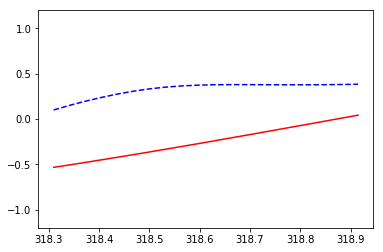

In [5]:
print("Training ==================")
for step in range(501):
    x_batch,y_batch,xs = get_batch()
    cost = model.train_on_batch(x_batch,y_batch)
    if step % 10 == 0:
        print("training cost:",cost)
pred = model.predict(x_batch,batch_size)
plt.plot(xs[0,:],y_batch[0].flatten(),"r",xs[0,:],pred.flatten()[:time_steps],"b--")
plt.ylim((-1.2,1.2))
# plt.draw()
# plt.pause(0.1)